# ***Student Performance Prediction Using Supervised Machine Learning***

<center>
<h1 style="background-color:red; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">1.Importing Libraries</h1>
</center>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the scipy.stats module for statistical functions
import scipy.stats as stats

# Importing the statsmodels.formula.api module for advanced statistical modeling
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

<center>
<h1 style="background-color:red; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">2.Data Importing </h1>
</center>

In [3]:
#Data import
Data = pd.read_csv('score.csv')

<center>
<h1 style="background-color:red; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">3.Data Reading and Cleaning </h1>
</center>

In [4]:
Data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
Data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
Data.shape

(25, 2)

In [6]:
#Data reading, checking dimensions and information of the data
print(Data)
print('dimensions:')
print(Data.shape)
print('Information:')
Data.info()

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
dimensions:
(25, 2)
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


*Dataset contains 25 entries with 2 columns: 'Hours' and 'Scores'.*

In [7]:
Data.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
Data.nunique()

Hours     23
Scores    23
dtype: int64

In [9]:
#Cheking for duplicates 
value=len(Data[Data.duplicated()])
print(value) 

0


*There are no missing values or duplicates in the data.*

In [10]:
Data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [11]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


*Statistical summary shows mean hours studied is 5.012 and mean score is 51.480.*

<center>
<h1 style="background-color:red; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">4.Data Visualization </h1>
</center>

/tmp/ipykernel_21/3521378344.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Scores'])


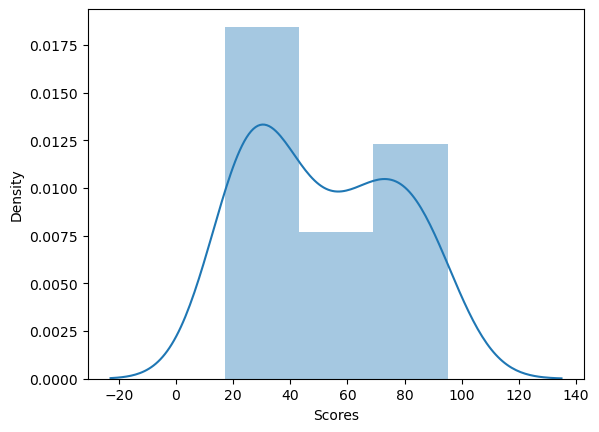

In [12]:
#DISTRIBUTION
sns.distplot(Data['Scores'])
plt.show()

*The distribution plot indicates a normal distribution of scores.*

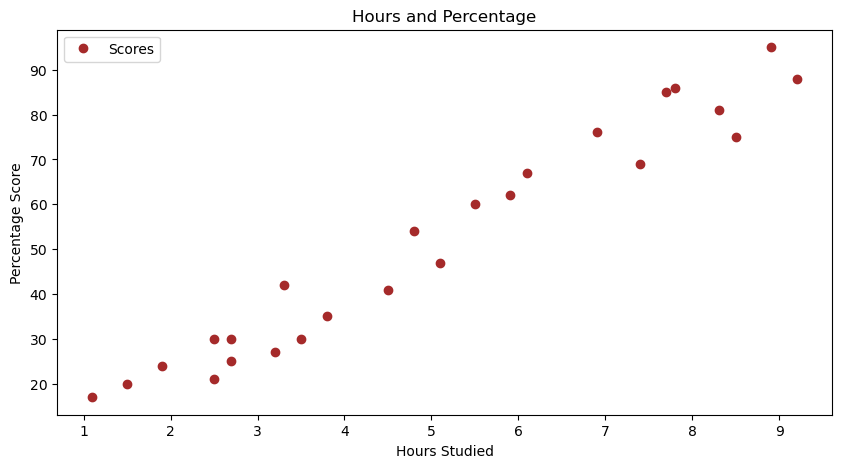

In [13]:
#Scatterpot
Data.plot(x='Hours', y='Scores', style ='o', color = "Brown",figsize = (10,5))  
plt.title('Hours and Percentage')  
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score') 
plt.show()

According to the scatter plot, there is a linear association between the Scores and the Number of Hours studied. It demonstrates a positive relationship between the two variables, with an increase in the Study hours resulting in an increase in the Marks scored.As a result, we can use the supervised machine learning model for linear regression on it to forecast future values.

<center>
<h1 style="background-color:red; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">5.Linear Regression </h1>
</center>

Linear regression is a statistical method used to model the relationship between a dependent variable (also known as the target or response variable) and one or more independent variables (also known as features, predictors, or regressors) by fitting a linear equation to the observed data.



In [8]:
# Extracting all rows and all columns except the last column (features) and storing it in 'x'
x = Data.iloc[:, :-1].values

# Extracting all rows and only the last column (target variable) and storing it in 'y'
y = Data.iloc[:, 1].values

In [9]:
#Model Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

from sklearn.linear_model import LinearRegression
reg = LinearRegression()  

# Fitting the linear regression model to the training data
# x_train is assumed to be a 1D array or a column vector (reshape is used to ensure compatibility)
# y_train is the corresponding target values
reg.fit(x_train.reshape(-1, 1), y_train)

# Printing a message to indicate that the training process is complete
print("Training complete.")

Training complete.


*The linear regression model is trained using the data.*

**Linear Regression Formula**

y = mx + c

Where:

y is the dependent variable (target)

x is the independent variable (feature)

m is the slope of the regression line

c is the y-intercept (the value of y when x is 0)

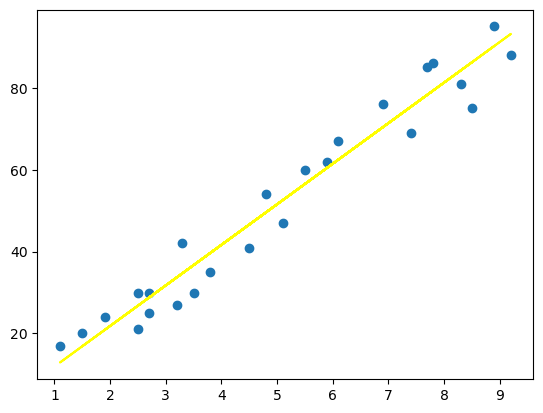

In [10]:
# Plotting the Regression Line

# Extracting the slope (m) and intercept (c) of the regression line from the trained model
m = reg.coef_
c = reg.intercept_

# Calculating the values of the regression line using the equation y = mx + c
line = m * x + c

# Importing the required module for plotting
import matplotlib.pyplot as plt

# Creating a scatter plot of the data points
plt.scatter(x, y)

# Plotting the regression line on the same plot
plt.plot(x, line, color="yellow")

# Displaying the plot
plt.show()


In [13]:
#Testing data
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
#Model Prediction 
y_pred = reg.predict(x_test)

In [12]:
#Comparing Acuta vs Predicted
actual_predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
actual_predicted

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
#Estimating training and test score
print("Training Score:",reg.score(x_train,y_train))
print("Test Score:",reg.score(x_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


*Training score: 95.16%, Test score: 94.55%*

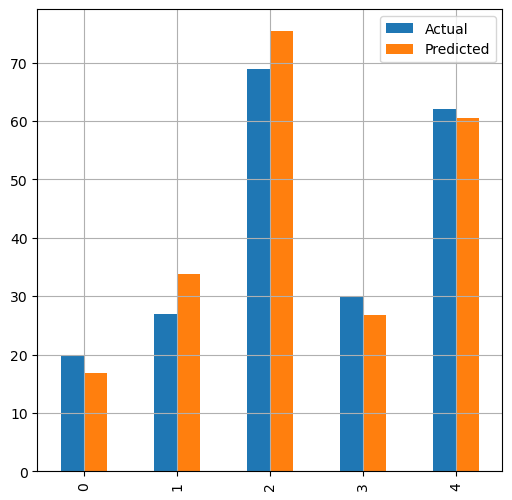

In [20]:
# Plotting the Bar graph to depict the difference between the actual and predicted value
actual_predicted.plot(kind='bar',figsize=(6,6))
plt.grid(which='major', linewidth='0.8')
plt.grid(which='minor', linewidth='0.8')
plt.show()

*Bar graph compares actual vs. predicted scores.*

In [21]:
y_pred=reg.predict(x_test)
df=pd.DataFrame({"Actual":y_test,"Predict":y_pred})
print(df)
print("Accuracy:",reg.score(x,y)*100)

   Actual    Predict
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033
Accuracy: 95.26947647057273


In [22]:
hours=9
p=reg.predict([[hours]])
print(f"If a student studied for {hours} hours/day will score{p}% in exam.")

If a student studied for 9 hours/day will score[91.21406837]% in exam.


In [23]:
#Model Evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
R2 score: 0.9454906892105354


<center>
<h1 style="background-color:red; color:white; font-size:40px; font-weight:bold; font-family:Times New Roman; border:2px solid black;">6.Conclusion </h1>
</center>

**The linear regression model can accurately predict student scores based on the number of study hours.
For example, a student studying 9 hours/day is predicted to score approximately 91.21% in the exam.
A successful model for predicting student scores based on study hours, with a high accuracy of 94.55%.** 